In [1]:
# Imports
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import datetime

In [4]:
# Getting the training dataset
dataset = pd.read_csv('/Users/yashsolanki/Desktop/Neural Networks/Fifa 19 nn/data.csv', index_col="Name", parse_dates=True)

In [6]:
# Printing the first five cells of the dataset
dataset.head()

,ID,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Name,,,,,,,,,,,,,,,,,,,,,
L. Messi,158023,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
Cristiano Ronaldo,20801,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
Neymar Jr,190871,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
De Gea,193080,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
K. De Bruyne,192985,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
dataset.isna().any()

ID                False
Age               False
Photo             False
Nationality       False
Flag              False
                  ...  
GKHandling         True
GKKicking          True
GKPositioning      True
GKReflexes         True
Release Clause     True
Length: 87, dtype: bool

In [8]:
# Getting somw information on the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18207 entries, L. Messi to G. Nugent
Data columns (total 87 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Age                       18207 non-null  int64  
 2   Photo                     18207 non-null  object 
 3   Nationality               18207 non-null  object 
 4   Flag                      18207 non-null  object 
 5   Overall                   18207 non-null  int64  
 6   Potential                 18207 non-null  int64  
 7   Club                      17966 non-null  object 
 8   Club Logo                 18207 non-null  object 
 9   Value                     18207 non-null  object 
 10  Wage                      18207 non-null  object 
 11  Special                   18207 non-null  int64  
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  

<AxesSubplot:>

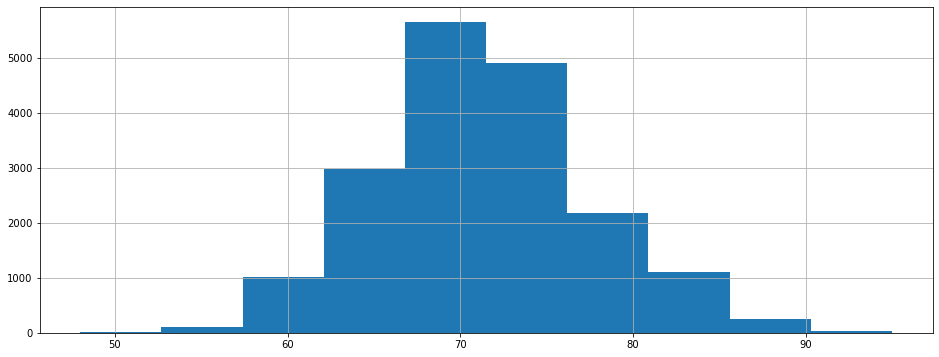

In [9]:
# Plotting somw values of the dataset
dataset['Potential'].hist(figsize=(16,6))

In [11]:
# Blurring out the first 7 lines
dataset.rolling(7).mean().head(20)

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Name,,,,,,,,,,,,,,,,,,,,,
L. Messi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cristiano Ronaldo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neymar Jr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
De Gea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K. De Bruyne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E. Hazard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L. Modrić,159434.285714,29.000000,92.000000,92.571429,2106.714286,4.428571,4.142857,3.857143,7.857143,74.857143,...,75.428571,88.000000,37.857143,37.857143,34.428571,21.571429,21.428571,21.428571,23.285714,22.000000
L. Suárez,162085.285714,29.000000,91.571429,92.142857,2127.285714,4.428571,4.142857,3.714286,7.714286,73.857143,...,76.857143,86.428571,42.000000,40.285714,36.142857,24.571429,23.428571,23.714286,26.000000,26.142857
Sergio Ramos,181379.714286,28.857143,91.142857,91.714286,2123.428571,4.285714,4.000000,3.428571,8.857143,71.285714,...,75.428571,84.571429,50.428571,49.000000,45.857143,25.142857,23.000000,22.857143,25.000000,26.142857


In [12]:
training_set=dataset['Overall']
training_set=pd.DataFrame(training_set)

In [13]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [22]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 18206):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [23]:
# Importing the Keras libraries and packages
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout


In [27]:
# Making the mdoel (RNN):- Reccurent Neural Network
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [38]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history = regressor.fit(X_train, y_train, epochs = 10, batch_size = 60, steps_per_epoch=10)


Epoch 1/10
10/10 [==============================] - 6s 145ms/step - loss: 0.0021
Epoch 2/10
10/10 [==============================] - 1s 122ms/step - loss: 0.0015
Epoch 3/10
10/10 [==============================] - 1s 135ms/step - loss: 0.0010
Epoch 4/10
10/10 [==============================] - 1s 129ms/step - loss: 8.6514e-04
Epoch 5/10
10/10 [==============================] - 1s 123ms/step - loss: 0.0010
Epoch 6/10
10/10 [==============================] - 1s 134ms/step - loss: 8.5768e-04
Epoch 7/10
10/10 [==============================] - 2s 152ms/step - loss: 8.4551e-04
Epoch 8/10
10/10 [==============================] - 1s 145ms/step - loss: 6.8522e-04
Epoch 9/10
10/10 [==============================] - 1s 129ms/step - loss: 7.7578e-04
Epoch 10/10
10/10 [==============================] - 1s 137ms/step - loss: 6.7345e-04


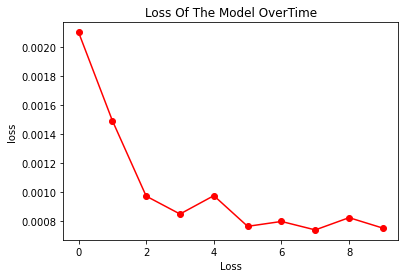

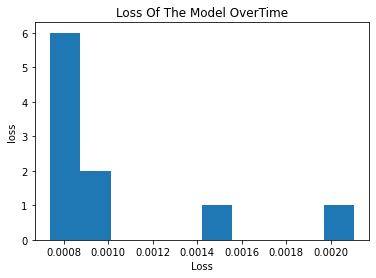

In [48]:
# Plotting the accuracy of the model
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string], 'ro-')
    plt.title("Loss Of The Model OverTime")
    plt.xlabel("Loss")
    plt.ylabel(string)
    plt.show()
    
def plot_histogram(history, string):
    plt.hist(history.history[string])
    plt.title("Loss Of The Model OverTime")
    plt.xlabel("Loss")
    plt.ylabel(string)
    plt.show()
    
plot_graphs(history, 'loss')
plot_histogram(history, 'loss')

In [52]:
# Getting the testing data
dataset_test = pd.read_csv('/Users/yashsolanki/Desktop/Neural Networks/Fifa 19 nn/test.csv',index_col="Name",parse_dates=True)

In [55]:
real_overall = dataset_test.iloc[:, 1:2].values

In [53]:
dataset_test.head()

,ID,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Name,,,,,,,,,,,,,,,,,,,,,
L. Messi,158023,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,...,96,33,28,26,6,11,15,14,8,€226.5M
Cristiano Ronaldo,20801,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,...,95,28,31,23,7,11,15,14,11,€127.1M
Neymar Jr,190871,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,...,94,27,24,33,9,9,15,15,11,€228.1M
De Gea,193080,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,...,68,15,21,13,90,85,87,88,94,€138.6M
K. De Bruyne,192985,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,...,88,68,58,51,15,13,5,10,13,€196.4M


In [56]:
test_set=dataset_test['Overall']
test_set=pd.DataFrame(test_set)

In [60]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Overall'], dataset_test['Overall']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_overall = regressor.predict(X_test)
predicted_overall = sc.inverse_transform(predicted_overall)

print(predicted_overall)

[[47.481953]
 [47.562374]
 [47.883244]
 [48.55085 ]
 [49.623848]
 [51.111076]
 [52.978123]
 [55.158657]
 [57.567593]
 [60.113525]
 [62.706608]
 [65.267654]
 [67.73297 ]
 [70.055855]
 [72.205696]
 [74.163864]
 [75.92273 ]
 [77.48357 ]
 [78.85434 ]
 [80.04742 ]]


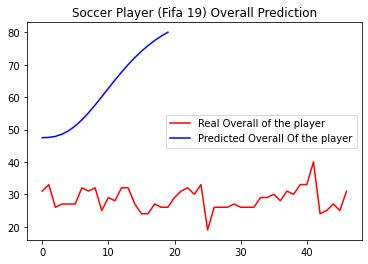

In [59]:
# Visualising the results
plt.plot(real_overall, color = 'red', label = 'Real Overall of the player')
plt.plot(predicted_overall, color = 'blue', label = 'Predicted Overall Of the player')
plt.title('Soccer Player (Fifa 19) Overall Prediction')
plt.legend()
plt.show()
